In [1]:
use "../3_output/regression_analysis_ind_with_ent_sent_june2020.dta", clear

## make labels and create demeaned vars

In [2]:
egen mean_ent_others = mean(ent_others)
gen ent_others_demean=ent_others-mean_ent_others



(2,773 missing values generated)


In [3]:
egen mean_ent_self = mean(ent_self)
gen ent_self_demean=ent_self-mean_ent_self



(2,773 missing values generated)


In [4]:
egen mean_avg_v2=mean(avg_v2)
gen avg_v2_demean=avg_v2-mean_avg_v2

In [5]:
egen mean_avgmean_others=mean(avgmean_others)
gen avgmean_others_demean=avgmean_others-mean_avgmean_others



(1,479 missing values generated)


In [6]:
gen ent_others_sq=ent_others*ent_others
gen ent_self_demean_sq=ent_self_demean*ent_self_demean


(2,773 missing values generated)

(2,773 missing values generated)


In [7]:

label variable ent_self_demean "Rating_Entropy_Self"
label variable ent_self "Rating_Entropy_Self"
label variable ent_others_demean "Rating_Entropy_Others"
label variable ent_others "Rating_Entropy_Others"
label variable avg_v2_demean "Average_Rating_Self"
label variable avg_v2 "Average_Rating_Self"
label variable avgmean_others_demean "Average_Rating_Others"
label variable avgmean_others "Average_Rating_Others"
label variable reviews_ct "Review_Count"
label variable log_experience "Experience"
label variable temp_own_price_diff_other "Price_Difference"
label variable log_zip_rev "Market_LogRevenue"
label variable ent_others_sq  "Rating_Entropy_Others^2"
label variable ent_self_demean_sq "Rating_Entropy_Self^2"
label variable log_quotes "Installer Activity Level"

In [8]:
su avg_sent_score


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576


In [9]:
su avg_sent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576
avg_sent_s~t |      8,113    .5971259    .2507234          0    .886075
avg_sent_s~s |      8,113    .5662764    .2792114     -.5994      .9576


In [10]:
gen avg_sent_score_demean=avg_sent_score-.4119695
label variable avg_sent_score_demean "Average_Sentiment_Self"
gen avg_sent_score_others_demean=avg_sent_score_others- .5615071
label variable avg_sent_score_others_demean "Average_Sentiment_Others"
gen text_d_self_p50_demean=text_d_self_p50-0.0635868
label variable text_d_self_p50_demean  "Text-based_Entropy_Self"
gen text_d_others_p50_demean=text_d_others_p50-0.1245589
label variable text_d_others_p50_demean "Text-based_Entropy_Others"






(4,113 missing values generated)


(1,535 missing values generated)



## Subsetting observations used for the model 

In [11]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


In [12]:
codebook installer_id


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [108,23027]                  units:  1
         unique values:  385                      missing .:  0/8,113

                  mean:   17971.7
              std. de

In [13]:
su reviews_ct,d


                        Review_Count
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               8,113
25%            0              0       Sum of Wgt.       8,113

50%            1                      Mean           3.397387
                        Largest       Std. Dev.       5.80235
75%            4             48
90%           10             48       Variance       33.66726
95%           14             51       Skewness       3.136374
99%           29             52       Kurtosis       15.33371


In [14]:
codebook installer_id if reviews_ct>3


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [363,22992]                  units:  1
         unique values:  186                      missing .:  0/2,287

                  mean:   18779.4
              std. de

In [15]:
su ent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     ent_mkt |      5,340    .2376226    .1857222          0    1.05492
  ent_others |      5,340    .2247373    .1915538          0   1.070593
    ent_self |      5,340    .0981426    .2199734          0   1.209574
ent_others~n |      5,340    2.79e-09    .1915538  -.2247373   .8458561
ent_self_d~n |      5,340   -1.38e-09    .2199734  -.0981426   1.111431
-------------+---------------------------------------------------------
ent_others~q |      5,340    .0871928    .1348904          0    1.14617
ent_self_d~q |      5,340    .0483792    .1159573   .0001067    1.23528


In [16]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


## Simply subset to high-reviews_ct obs

In [27]:
su reviews_ct,d


                        Review_Count
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            1              0       Obs               5,340
25%            1              0       Sum of Wgt.       5,340

50%            3                      Mean            5.16161
                        Largest       Std. Dev.      6.484259
75%            6             48
90%           12             48       Variance       42.04561
95%           19             51       Skewness       2.652859
99%           32             52       Kurtosis       11.56258


In [31]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_11_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean c.ent_others_demean#c.ent_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

eststo clear 

drop if ent_others_demean==.


 
qui:areg f.log_quotes  $iv_0_demean if reviews_ct>=5 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if reviews_ct>=5  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if reviews_ct>=5 , absorb( installer_id) vce(robust)
eststo

esttab est1 est2 est3   ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)
  






(0 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


--------------------------------------------------------------------
                              (1)             (2)             (3)   
                     F.Installe~l    F.Installe~l    F.Installe~l   
--------------------------------------------------------------------
Rating_Entropy_Self                                         1.418   
                                                          (0.059)   

Rating_Entropy_Sel~t                                       -2.723***
                                                          (0.001)   

Rating_Entropy_Oth~s                        0.916*          0.884*  
                                          (0.013)         (0.016)   

Rating_Entropy_Oth~E                       -1.691          -2.046*  
                                          (0.077)         (0.037)   

Average_Rating_Self        -0.467          -0.396          -0.513   
                   

## Examine the monthly and quarterly additions

In [22]:
gen diff_reviews_ct_monthly=reviews_ct-l.reviews_ct

(364 missing values generated)


In [23]:
gen diff_reviews_ct_quarterly=reviews_ct-l4.reviews_ct

(1,335 missing values generated)


In [24]:
su diff_reviews_ct*,d


                   diff_reviews_ct_monthly
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               4,976
25%            0              0       Sum of Wgt.       4,976

50%            0                      Mean           .4240354
                        Largest       Std. Dev.      1.362918
75%            0             21
90%            1             22       Variance       1.857545
95%            2             25       Skewness       8.061613
99%            6             25       Kurtosis       104.0344

                  diff_reviews_ct_quarterly
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               4,005
25%            0              0       Sum of Wgt.       4,005

50%

In [32]:
codebook installer_id


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [363,23027]                  units:  1
         unique values:  364                      missing .:  0/5,340

                  mean:   18516.3
              std. de

In [36]:
codebook installer_id if diff_reviews_ct_monthly>2&diff_reviews_ct_monthly!=.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [551,23027]                  units:  1
         unique values:  139                      missing .:  0/220

                  mean:   19573.7
              std. dev:

In [38]:
su if diff_reviews_ct_monthly>1&diff_reviews_ct_monthly!=.


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         avg |        407    4.885985    .2516607        3.4          5
avg_sent_s~e |        407    .6858469    .1012211   .3089571      .9017
        five |        407    9.891892    9.220245          1         46
        four |        407    .3857494    .8515956          0          6
installer_id |        407    19097.42     6209.88        424      23027
-------------+---------------------------------------------------------
      market |        407    17.03194    13.92915         -1         36
         one |        407    .1670762    .5172845          0          4
quotes_count |        407    80.91892    135.5911          1        908
  reviews_ct |        407    10.56757    9.784109          2         51
       three |        407    .0614251    .2783854          0          2
-------------+-------------------------------------------------

In [39]:
su if diff_reviews_ct_quarterly>1&diff_reviews_ct_quarterly!=.


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         avg |        925    4.835838    .3577179          1          5
avg_sent_s~e |        925    .6770284    .1167429     -.0867      .8905
        five |        925    10.96865    8.762998          0         47
        four |        925     .492973    1.058466          0          6
installer_id |        925    18179.69    6979.268        363      22843
-------------+---------------------------------------------------------
      market |        925    16.93514    13.87592         -1         36
         one |        925    .2702703    .7255632          0          5
quotes_count |        925    87.59351    143.1137          0       1080
  reviews_ct |        925     11.8973    9.494316          2         52
       three |        925    .0605405    .2644314          0          2
-------------+-------------------------------------------------

(bin=36, start=0, width=.86111111)


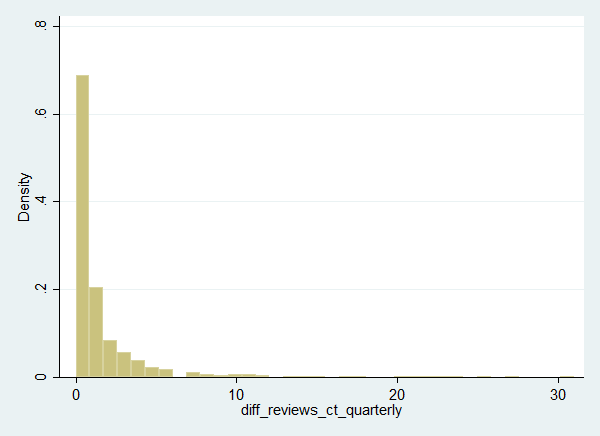

In [25]:
histogram diff_reviews_ct_quarterly

In [50]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_11_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean c.ent_others_demean#c.ent_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

eststo clear 

drop if ent_others_demean==.


qui:areg f.log_quotes  $iv_0_demean  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean    , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean  , absorb( installer_id) vce(robust)
eststo   
qui:areg f.log_quotes  $iv_0_demean if reviews_ct>=5 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if reviews_ct>=5  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if reviews_ct>=5 , absorb( installer_id) vce(robust)
eststo   
qui:areg f.log_quotes  $iv_0_demean if mod(year_month_count,2)==1 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if mod(year_month_count,2)==1   , absorb( installer_id) vce(robust) 
eststo
qui:areg f.log_quotes  $iv_12_demean if mod(year_month_count,2)==1 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_0_demean if mod(year_month_count,4)==1 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if mod(year_month_count,4)==1   , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if mod(year_month_count,4)==1 , absorb( installer_id) vce(robust)
eststo

esttab  est5 est6  est8 est9  est11 est12 ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)

esttab  est5 est6  est8 est9  est11 est12 using rob_subsettingreviewsct.csv  ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)






(0 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


(est4 stored)


(est5 stored)


(est6 stored)


(est7 stored)


(est8 stored)


(est9 stored)


(est10 stored)


(est11 stored)


(est12 stored)


--------------------------------------------------------------------------------------------------------------------
                              (1)             (2)             (3)             (4)             (5)             (6)   
                     F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l   
--------------------------------------------------------------------------------------------------------------------
Rating_Entropy_Self                         1.418                           0.956                           1.529   
                                          (0.059)                         (0.085)                         (0.094)   

Rating_Entropy_Sel~t                       -2.723***                  